# Ejercicios de precipitación

## <font color=steelblue>Ejercicio 2 - Curvas de doble masa<br>

<font color=steelblue>La tabla *MassCurve* en el archivo *RainfallData.xlsx* proporciona la precipitación anual medida durante 17 años en cinco estaciones pluviométricas de una región. La ubicación de la estación C cambió en el año 1974. Realiza un análisis mediante una curva de doble masa para verificar la consistencia en la información del pluviómetro y realiza los ajustes pertinentes para corregir las inconsistencias descubiertas.</font>

In [26]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
#plt.style.use('seaborn-whitegrid')

from scipy.optimize import curve_fit

Una **curva de doble masa** es un gráfico de datos acumulado de una serie de datos de una variable frente a la serie de datos acumulados de otra variable en el mismo periodo de medición. Habitualmente, la variable de comparación es la serie acumulada de la media de las observaciones en otras estaciones.
    
<img src="img/Double mass curve.JPG" alt="Mountain View" style="width:450px">

> <font color=grey>Curva de doble masa de datos de precipitación. *(Double-Mass Curves. USGS, 1960)*.</font>
    
La serie de una estación es correcta si la curva de doble masa es una línea recta; la pendiente de dicha recta es la constante de proporcionalidad entre las series. Un cambio de pendiente en la recta significa un cambio en la constante de proporcionalidad y que la serie antes o después de ese punto debe ser corregida.

La curva de doble masa, cuando se aplica a precipitación, toma la forma $Y=bX$, donde $b$ es la pendiente. No hay ordenada en el origen.

In [5]:
# Importar los datos de la hoja 'Data' en '2MassCurve.xls'
data2 = pd.read_excel('..\data\RainfallData.xlsx', sheet_name='2MassCurve',
                      skiprows=4,
             index_col=0, usecols=range(6))
data2.head()

,A,B,C,D,E
Year,,,,,
1970,1010,1161,780,949,1135
1971,1005,978,1041,784,970
1972,1067,1226,1027,1067,1158
1973,1051,880,825,1014,1022
1974,801,1146,933,923,821


In [6]:
# Calcular la media anual entre todas las estaciones
data2['AVG'] = data2.mean(axis=1)
data2.head()

,A,B,C,D,E,AVG
Year,,,,,,
1970,1010,1161,780,949,1135,1007.0
1971,1005,978,1041,784,970,955.6
1972,1067,1226,1027,1067,1158,1109.0
1973,1051,880,825,1014,1022,958.4
1974,801,1146,933,923,821,924.8


Primeramente, creamos un gráfico de dispersión que compare la serie de precipitación anual en el pluviómetro C frente a la media de todas las estaciones. La gráfica muestra también la regresión lineal entre las dos series según la fórmula $Y=bX$.

In [7]:
def linear_reg(x, b):
    """Linear regression with no intecept
    
    y = b * x   
    
    Input:
    ------
    x:         float. Independet value
    b:         float. Slope of the linear regression
    
    Output:
    -------
    y:         float. Regressed value"""
    
    y = b * x
    return y

In [8]:
# Ajustar la regresión lineal
b = curve_fit(linear_reg, data2.AVG, data2.C)[0][0]
b

0.944138390867605

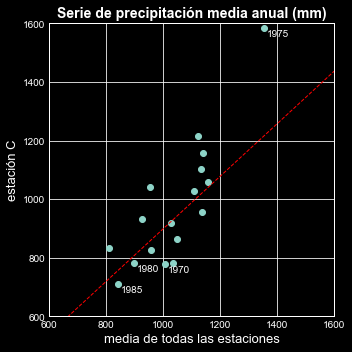

In [24]:
fig, ax = plt.subplots(figsize=(5,5))

# configuración
ax.set_title('Serie de precipitación media anual (mm)', fontsize=14,
             fontweight='bold')
ax.set_xlabel('media de todas las estaciones', fontsize=13)
ax.set_ylabel('estación C', fontsize=13)
ax.set(xlim=(600, 1600), ylim=(600, 1600))

# diagrama de dispersión
ax.scatter(data2.AVG, data2.C)

# recta de regresión
ax.plot([0, 3000], [0, b * 3000], 'r--', linewidth=1)

# label one every five years
years = data2.index[::5]
xyear = [data2.loc[year, 'AVG'] + 10 for year in years]
yyear = [data2.loc[year, 'C'] - 20 for year in years] 
for i, year in enumerate(years):
    ax.text(xyear[i], yyear[i], year, verticalalignment='center')

plt.tight_layout()

Este tipo de gráfico tiene mucha dispersión causada por la variabilidad anual del clima, por lo que no es conveniente para encontrar anomalías. 

Por eso se utiliza la **curva de doble masa**. Esta gráfica se crea a partir de las series de **precipitación acumulada**. De esta manera, la gráfica ha de tener siempre una pendiente positiva y continua; cualquier cambio de pendiente representa una anomalía en la serie de precipitación.

In [10]:
# Serie anual de precipitación acumulada
accData2 = data2.cumsum()
accData2.head()

,A,B,C,D,E,AVG
Year,,,,,,
1970,1010.0,1161.0,780.0,949.0,1135.0,1007.0
1971,2015.0,2139.0,1821.0,1733.0,2105.0,1962.6
1972,3082.0,3365.0,2848.0,2800.0,3263.0,3071.6
1973,4133.0,4245.0,3673.0,3814.0,4285.0,4030.0
1974,4934.0,5391.0,4606.0,4737.0,5106.0,4954.8


In [11]:
# ajustar la regresión lineal
b = curve_fit(linear_reg, accData2.AVG, accData2.C)[0][0]
b

0.9472720120775414

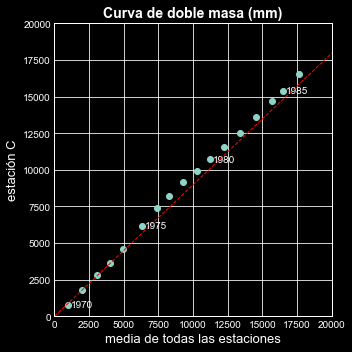

In [23]:
fig, ax = plt.subplots(figsize=(5,5))
lim = 20000
thr = 0.1

# configuración
ax.set_title('Curva de doble masa (mm)', fontsize=14, fontweight='bold')
ax.set_xlabel('media de todas las estaciones', fontsize=13)
ax.set_ylabel('estación C', fontsize=13)
ax.set(xlim=(0, lim), ylim=(0, lim))

# diagrama de dispersión
ax.scatter(accData2.AVG, accData2.C, label='original')

# regresión lineal
ax.plot([0, lim], [0, b * lim], 'r--', linewidth=1)

# etiquetar uno de cada cinco años
years = accData2.index[::5]
xyear = [accData2.loc[year, 'AVG'] + 200 for year in years]
yyear = [accData2.loc[year, 'C'] for year in years] 
for i, year in enumerate(years):
    ax.text(xyear[i], yyear[i], year, verticalalignment='center')
          
plt.tight_layout()

In [13]:
# identificar años con anomalía
for j, year in enumerate(accData2.index[4:-4]):
    # pendiente de la recta de regresión hasta 'year'
    p1 = np.polyfit(accData2.loc[:year, 'AVG'],
                    accData2.loc[:year, 'C'], 1)
    # pendiente de la recta de regresión a partir de 'year'
    p2 = np.polyfit(accData2.loc[year + 1:, 'AVG'],
                    accData2.loc[year + 1:, 'C'], 1)
    # identificar como anomalía si el cociente de las pendientes se aleja de 1
    if (p1[0] / p2[0] < 1 - thr) | (p1[0] / p2[0] > 1 + thr):
        print("Potential anomaly: year {0}".format(year))

Potential anomaly: year 1975
Potential anomaly: year 1976
Potential anomaly: year 1977
Potential anomaly: year 1978
Potential anomaly: year 1979


El análisis muestra un cambio en la pendiente a partir de 1976, lo que concuerda con el hecho de que la estación cambió de ubicación en 1974. Puesto que no disponemos de información para decidir si la serie correcta es la anterior o posterior a 1976, corregiremos los datos previos a dicha fecha.

In [14]:
# año de la anomalía
year = 1976

In [15]:
# pendiente antes de la anomalía
# ------------------------------
b_wrong = curve_fit(linear_reg, accData2.loc[:year, 'AVG'],
                    accData2.loc[:year, 'C'])[0][0]
b_wrong

0.9648376054834307

In [16]:
# pendiente después de la anomalía
# --------------------------------
# extraer datos posteriores a la anomalía
temp = data2.loc[year + 1:, :].copy()
# calcular serie acumulada
accTemp = temp.cumsum(axis=0)    
# ajustar la regresión
b_right = curve_fit(linear_reg, accTemp.AVG, accTemp.C)[0][0]
b_right

0.8836253396178155

In [17]:
# corregir datos originales
# -------------------------
# crear columna para los datos corregidos
data2['C_c'] = data2.C
# corregir datos
data2.loc[:year, 'C_c'] = data2.loc[:year, 'C'] * b_right / b_wrong
# recalcular la serie acumulada
accData2 = data2.cumsum(axis=0)

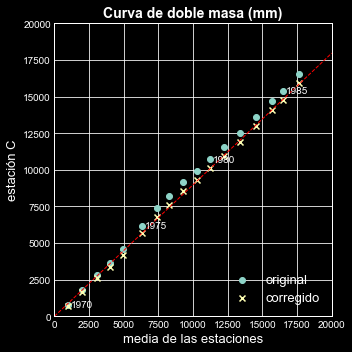

In [25]:
# GRÁFICO CON LA SERIE ORIGINAL Y LA CORREGIDA
# --------------------------------------------
fig, ax = plt.subplots(figsize=(5,5))
lim = 20000

# configuración
ax.set_title('Curva de doble masa (mm)', fontsize=14, fontweight='bold')
ax.set_xlabel('media de las estaciones', fontsize=13)
ax.set_ylabel('estación C', fontsize=13)
ax.set(xlim=(0, lim), ylim=(0, lim))

# diagramas de dispersión
ax.scatter(accData2.AVG, accData2.C, label='original')
ax.scatter(accData2.AVG, accData2.C_c, marker='x', label='corregido')

# regresión linal
b = curve_fit(linear_reg, accData2.AVG, accData2.C_c)[0][0]
ax.plot([0, lim], [0, b * lim], 'r--', linewidth=1)

# etiquetas uno de cada cinco años
years = accData2.index[::5]
xyear = [accData2.loc[year, 'AVG'] + 200 for year in years]
yyear = [accData2.loc[year, 'C'] for year in years] 
for i, year in enumerate(years):
    ax.text(xyear[i], yyear[i], year, verticalalignment='center')

ax.legend(loc=4, ncol=1, fontsize=13)
plt.tight_layout()